In [18]:
from neuralprophet import NeuralProphet
import pandas as pd

In [19]:
base_dataset = "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/Datasets/dataset_TPV/base_pump_23042023_A_resampled_10min"

df = pd.read_csv(f"{base_dataset}/base_pump_23042023_A_resampled_10min.csv")

x = list(range(len(df["temperature"].tolist())))
y = df["temperature"].tolist()
x_time = df["Time"].tolist()

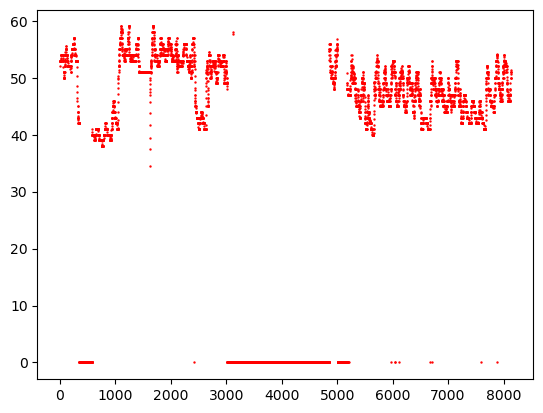

In [20]:
x = list(range(len(df["temperature"].tolist())))
y = df["temperature"].tolist()
x_time = df["Time"].tolist()

import matplotlib.pyplot as plt

plt.scatter(x, y, s=0.5, color="red")

In [23]:
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [22]:
zero_indices = [index for index, value in enumerate(y) if value == 0]
# 3016
zero_indices[0], zero_indices[-1]

(348, 7881)

In [5]:
df_ = df# [df["temperature"]!=0]

x = list(range(len(df_["temperature"].tolist())))
y = df_["temperature"].tolist()
x_time = df_["Time"].tolist()

print(len(x), len(x_time))

8134 8134


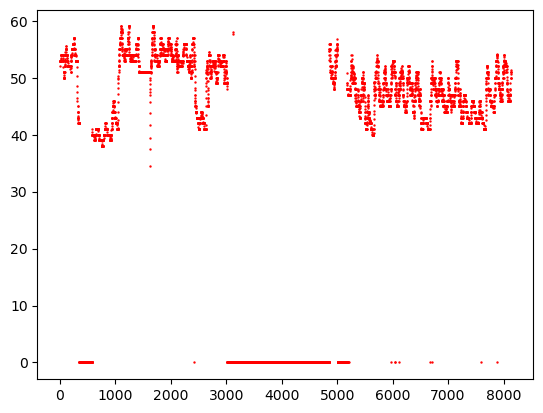

In [6]:
plt.scatter(x, y, s=0.5, color="red")

In [7]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")

from utils.read_dataset import ReadDatasets
import numpy as np

df_ = pd.DataFrame({'ds':x_time, 'y':y})

In [8]:
df_.shape

(8134, 2)

In [9]:
# 3016
zero_indices[0], zero_indices[-1]

(348, 7881)

In [10]:
# df_ = df_[df_["y"]!=0]

df_train = df_[:3016]
df_test = df_[7881:]

In [11]:
# m = NeuralProphet(growth="discontinuous",
#                   n_changepoints=10,
#                   seasonality_mode="multiplicative",#"additive",#
#                   # loss_func="MAE",
#                   trend_reg_threshold=True,
#                   weekly_seasonality=True,
#                   daily_seasonality=True,
#                   epochs=1000)

m = NeuralProphet(growth="discontinuous",
                  n_changepoints=10,
                  seasonality_mode="multiplicative",#"additive",#
                  loss_func="MAE",
                  trend_reg_threshold=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  epochs=1000)

metrics = m.fit(df_train)

INFO - (NP.config.__post_init__) - Trend reg threshold ignored due to reg lambda <= 0.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.967% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 10T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (95) is too small than the required number for the learning rate finder (237). The results might not be optimal.


Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [12]:
forecast = m.predict(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T


Predicting: 95it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [13]:
#m.set_plotting_backend('plotly')
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()

### Avaliable model

In [14]:
future = m.make_future_dataframe(df_,
                                 periods=6,
                                 n_historic_predictions=len(df))

forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T


Predicting: 95it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [15]:
#plotar pontos na previsão.
fig_forecast = m.plot(forecast)
fig_forecast

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~1h</i>',
              'type': 'scatter',
              'uid': '7ab05048-dc6d-4312-89cb-c82657774ca3',
              'x': array([datetime.datetime(2023, 2, 16, 2, 40),
                          datetime.datetime(2023, 2, 16, 4, 0),
                          datetime.datetime(2023, 2, 16, 4, 30), ...,
                          datetime.datetime(2023, 4, 13, 13, 30),
                          datetime.datetime(2023, 4, 13, 14, 10),
                          datetime.datetime(2023, 4, 13, 15, 10)], dtype=object),
              'y': array([54.02609253, 54.06508636, 53.96074677, ..., 39.75901794, 39.92285156,
                          40.4384079 ])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
          

In [17]:
fig_components = m.plot_components(forecast)
fig_components

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~1h</i>',
              'showlegend': False,
              'type': 'scatter',
              'uid': '29b0ca02-d7ca-47b1-a226-dc92b3b149da',
              'x': array([datetime.datetime(2023, 2, 16, 2, 40),
                          datetime.datetime(2023, 2, 16, 2, 50),
                          datetime.datetime(2023, 2, 16, 4, 10), ...,
                          datetime.datetime(2023, 4, 13, 13, 10),
                          datetime.datetime(2023, 4, 13, 14, 50),
                          datetime.datetime(2023, 4, 13, 15, 10)], dtype=object),
              'xaxis': 'x',
              'y': array([53.74430084, 53.7298584 , 53.6142807 , ..., 39.50294113, 39.48360062,
                          39.4797287 ]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 